## Importing libraries

In [1]:
import pandas as pd

## Importing Dataset

In [28]:
df = pd.read_csv(r"C:\Users\91830\Downloads\Data Science  Course\Machine Learning\Tabular Data\cancer_prediction_data (2).csv")

In [29]:
df

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1
...,...,...,...,...,...,...,...,...,...,...
1995,53.0,NaN,4.058134,High,Mild,No,Current Smoker,Low,NaN,0
1996,57.0,Female,5.542532,High,Moderate,Yes,Former Smoker,High,Occasionally,1
1997,NaN,Female,0.866000,Medium,Mild,NaN,Non-Smoker,High,Never,0
1998,47.0,NaN,7.859645,Low,Severe,Yes,Former Smoker,NaN,Rarely,1


##  EDA

In [7]:
pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.1 MB 1.7 MB/s eta 0:00:10
    --------------------------------------- 0.2/15.1 MB 1.8 MB/s eta 0:00:09
    --------------------------------------- 0.2/15.1 MB 1.8 MB/s eta 0:00:09
    --------------------------------------- 0.2/15.1 MB 1.3 MB/s eta 0:00:12
    --------------------------------------- 0.3/15.1 MB 1.4 MB/s eta 0:00:11
   - -------------------------------------- 0.4/15.1 MB 1.4 MB/s eta 0:00:11
   - -------------------------------------- 0.4/15.1 MB 1.3 MB/s eta 0:00:12
   - -------------------------------------- 0.5/15.1 MB 1.2 MB/s eta 0:00:13
   - -------------------------------------- 0.5/15.1 MB 1.2 MB/s eta 0:00:13
   - -------------------------------------- 0.6/15.1 MB 1.2 MB/s eta 0:00:13
   - -------------------------------------- 0.6/15.1 MB 1.2 MB/s eta 0:00:13
   - --------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\91830\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
import sweetviz

In [9]:
viz = sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [10]:
viz.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
df.head()

,Age,Gender,Tumor_Size,Tumor_Grade,Symptoms_Severity,Family_History,Smoking_History,Alcohol_Consumption,Exercise_Frequency,Cancer_Present
0,62.0,Male,9.763242,High,Mild,Yes,Former Smoker,Moderate,NaN,0
1,33.0,Male,7.946532,NaN,Moderate,Yes,Current Smoker,NaN,Regularly,1
2,33.0,Female,NaN,High,Moderate,No,Current Smoker,High,Rarely,1
3,58.0,Female,NaN,Low,Mild,NaN,Current Smoker,NaN,Rarely,1
4,NaN,Female,1.384231,Medium,Mild,No,Former Smoker,Moderate,Occasionally,1


In [13]:
df.isna().sum()

Age                    189
Gender                 206
Tumor_Size             171
Tumor_Grade            193
Symptoms_Severity      185
Family_History         208
Smoking_History        179
Alcohol_Consumption    679
Exercise_Frequency     195
Cancer_Present           0
dtype: int64

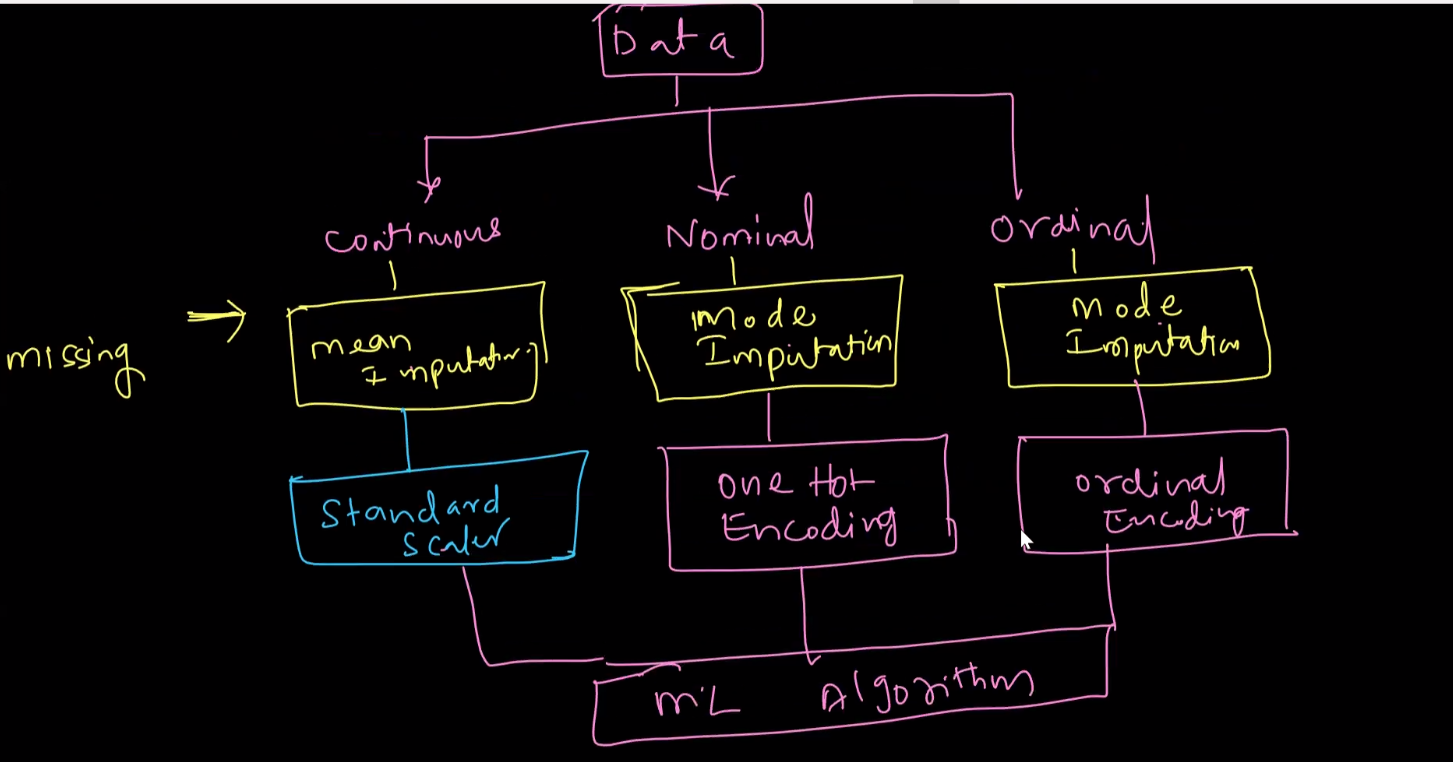

# Pipeline & Column Transformer
- Sequencetial Transformation


In [32]:
df['Exercise_Frequency'].unique()

array([nan, 'Regularly', 'Rarely', 'Occasionally', 'Never'], dtype=object)

In [15]:
cont = ['Age','Tumor_Size']
nominal = ['Gender','Family_History','Smoking_History']
ordinal = ['Tumor_Grade','Symptoms_Severity','Alcohol_Consumption','Exercise_Frequency']

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [33]:
order = [['Low','Medium','High'],
        ['Mild','Moderate','Severe'],
        ['Low','Moderate','High'],
        ['Never','Rarely','Occasionally','Regularly']]

In [35]:
cont_transform = Pipeline([("Mean Imputation", SimpleImputer(strategy='mean')),
         ('Standard Scalar', StandardScaler())])
nomi_transform = Pipeline([("Mode Imputation", SimpleImputer(strategy='most_frequent')),
         ('ohe', OneHotEncoder(drop='first'))])
ordi_transform = Pipeline([("Mode Imputation", SimpleImputer(strategy='most_frequent')),
         ('ohe', OrdinalEncoder(categories=order))])

In [36]:
from sklearn.compose import ColumnTransformer

In [39]:
preprocess = ColumnTransformer([('Continuos Transform', cont_transform, cont),
                  ('Nominal Transform',nomi_transform,nominal),
                  ('Ordinal Transform',ordi_transform,ordinal)])
preprocess

ColumnTransformer(transformers=[('Continuos Transform',
                                 Pipeline(steps=[('Mean Imputation',
                                                  SimpleImputer()),
                                                 ('Standard Scalar',
                                                  StandardScaler())]),
                                 ['Age', 'Tumor_Size']),
                                ('Nominal Transform',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Gender', 'Family_History',
                                  'Smoking_History']),
                                ('Ordinal Transform',
                                 Pipeline(steps=[('Mode Imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Mild',
                                                                              'Moderate',
                                                                              'Severe'],
                                                                             ['Low',
                                                                              'Moderate',
                                                                              'High'],
                                                                             ['Never',
                                                                              'Rarely',
                                                                              'Occasionally',
                                                                              'Regularly']]))]),
                                 ['Tumor_Grade', 'Symptoms_Severity',
                                  'Alcohol_Consumption',
                                  'Exercise_Frequency'])])

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = Pipeline([('Data Preprocessing',preprocess),
         ('Algorithm',LogisticRegression())])
model

Pipeline(steps=[('Data Preprocessing',
                 ColumnTransformer(transformers=[('Continuos Transform',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Standard '
                                                                   'Scalar',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tumor_Size']),
                                                 ('Nominal Transform',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender'...
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Mild',
                                                                                               'Moderate',
                                                                                               'Severe'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Rarely',
                                                                                               'Occasionally',
                                                                                               'Regularly']]))]),
                                                  ['Tumor_Grade',
                                                   'Symptoms_Severity',
                                                   'Alcohol_Consumption',
                                                   'Exercise_Frequency'])])),
                ('Algorithm', LogisticRegression())])

In [45]:
X = df.drop('Cancer_Present',axis=1)
y = df['Cancer_Present']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

In [53]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.5375